In [48]:
f = open("C:\\Users\\91990\\Downloads\\Polymer.data", "r")
raw = f.readlines()

# Without Flattening Features

In [49]:
fin = []
for i in range(len(raw)):
    if raw[i] == "ITEM: ATOMS id mol type xu yu zu vx vy vz \n":
        for j in range(i+1, i+101):
            w = raw[j].split(' ')
            w1 = w[3:-1]
            fin.append(w1)
len(fin[0])

6

In [50]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns

In [51]:
scaler = StandardScaler()
scaled = scaler.fit_transform(fin)

In [52]:
scaled.shape

(1206000, 6)

In [53]:
pca = PCA(n_components=2)
pc = pca.fit_transform(scaled)
pc.shape

(1206000, 2)

<AxesSubplot:>

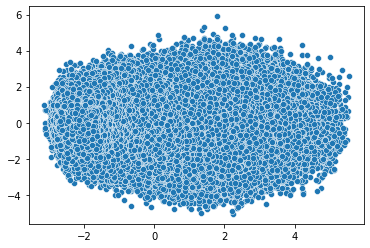

In [54]:
sns.scatterplot(x = pc[:,0], y = pc[:,1])

In [55]:
kmeans = KMeans(n_clusters= 3)
label = kmeans.fit_predict(scaled)
print(len(label))

1206000


<AxesSubplot:>

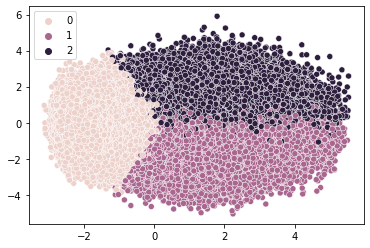

In [56]:
sns.scatterplot(x = pc[:,0], y =pc[:,1], hue = label)

In [57]:
c = list(range(2,10))
e = []
for i in c:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pc)
    e.append(kmeans.inertia_)

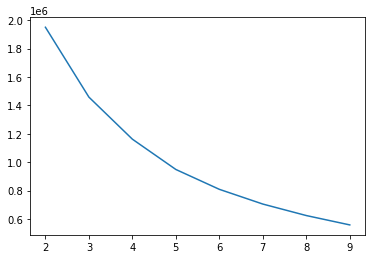

In [58]:
import matplotlib.pyplot as plt
plt.plot(c, e)

# Flattening Each Snapshot of Molecule

In [59]:
fin = []
for i in range(len(raw)):
    if raw[i] == "ITEM: ATOMS id mol type xu yu zu vx vy vz \n":
        matrix = []
        for j in range(i+1, i+101):
            w = raw[j].split(' ')
            w1 = w[3:-1]
            matrix.append(w1)
        fin.append(matrix)

In [60]:
pca_data = []
for i in range(len(fin)):
    v = []
    for j in range(100):
        v.extend(fin[i][j])
    pca_data.append(v)

In [61]:
pca_data = np.array(pca_data)

In [62]:
scaler = StandardScaler()
a = scaler.fit_transform(pca_data)

In [63]:
pca = PCA(n_components=3)
pc = pca.fit_transform(a)
pc.shape

(12060, 3)

<AxesSubplot:>

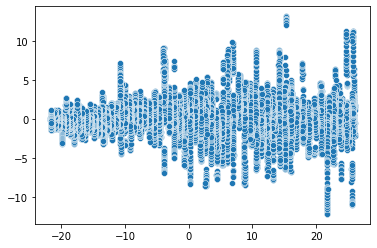

In [64]:
sns.scatterplot(x = pc[:,0], y = pc[:,1])

In [65]:
kmeans = KMeans(n_clusters= 3)
label = kmeans.fit_predict(a)
print(len(label))

12060


<AxesSubplot:>

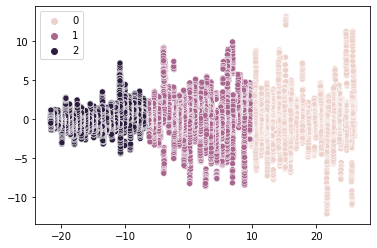

In [66]:
sns.scatterplot(x = pc[:,0], y =pc[:,1], hue = label)

In [67]:
c = list(range(2,10))
e = []
for i in c:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pc)
    e.append(kmeans.inertia_)

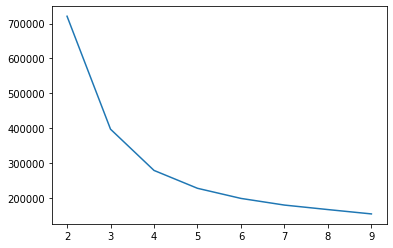

In [68]:
import matplotlib.pyplot as plt
plt.plot(c, e)